In [51]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
from analysis import download_database
download_database()

Connection successfully established ... 
File successfully downloaded ...


In [53]:
from analysis import DataBase
data = DataBase('equipsy.ABETdb')
group_experiments = data.get_group_experiments()

-- ----------------------------------------------------------
-- MDB Tools - A library for reading MS Access database files
-- Copyright (C) 2000-2011 Brian Bruns and others.
-- Files in libmdb are licensed under LGPL and the utilities under
-- the GPL, see COPYING.LIB and COPYING files respectively.
-- Check out http://mdbtools.sourceforge.net
-- ----------------------------------------------------------

-- That file uses encoding UTF-8

CREATE TABLE `tbl_Schedules`
 (
	`SID`			int not null auto_increment unique, 
	`SName`			varchar (100), 
	`SEnviro`			varchar (50), 
	`SMachineName`			varchar (30), 
	`SVersion`			varchar (10), 
	`SRunDate`			datetime, 
	`SFinal`			boolean NOT NULL, 
	`ZE_GUID`			varchar (50), 
	`ZS_GUID`			varchar (50), 
	`SRecCount`			int
);

-- CREATE INDEXES ...
ALTER TABLE `tbl_Schedules` ADD PRIMARY KEY (`SID`);

CREATE TABLE `tbl_Schedule_Notes`
 (
	`SID`			int, 
	`NName`			varchar (100), 
	`NValue`			text
);

-- CREATE INDEXES ...

CREATE TABLE `tbl_Data`
 (


No MSysRelationships


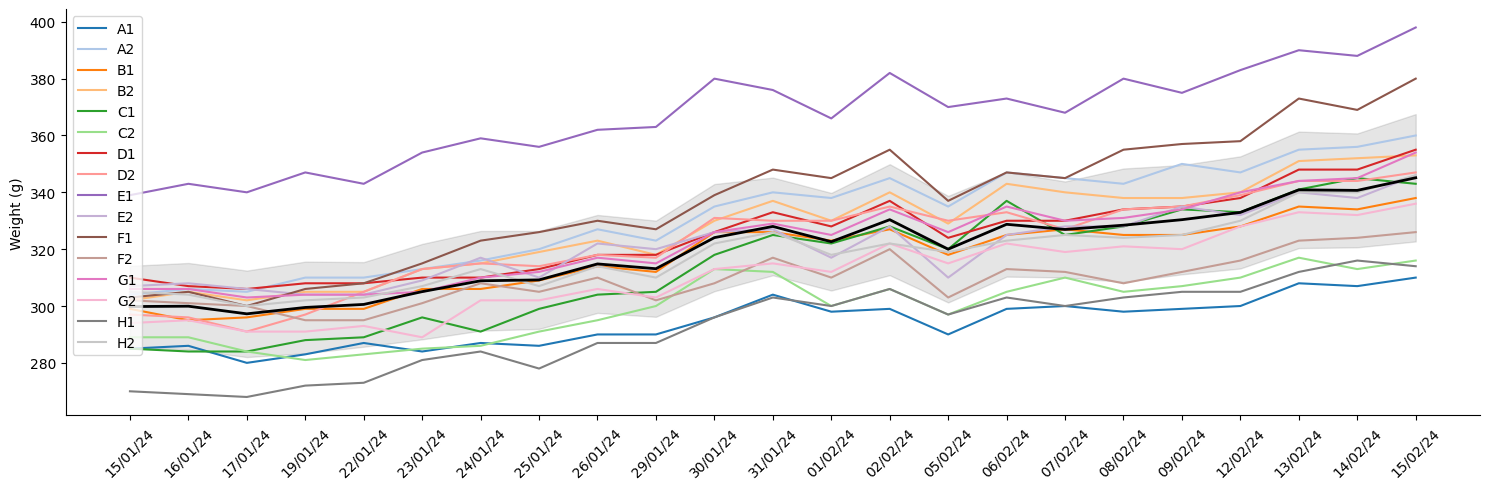

In [59]:
from plotting import *
display_weights(group_experiments, output='weights.png')

In [58]:
data._get_weights_from_google_drive()

In [ ]:
from plotting import *
for type in group_experiments.all_types:
    a = group_experiments.get_experiments_per_types(type)
    display_variables(a, output=f'{type}.png')

In [ ]:
for date in ['05/02/24', '06/02/24', '07/02/24', '08/02/24', '09/02/24']:
    a = group_experiments.get_experiments_per_dates(date)
    mydate = date.replace('/', '')
    display_stats_group_experiments(a, output=f'stats_{mydate}.png')
    display_group_experiments(a, output=f'individuals_{mydate}.png')

In [6]:
# Get initial weights
all_reaction_times = []
all_perfs = []
all_corrcoeffs = []
all_types = []
for type in ['Theta 1', 'Theta 2']:
    a = group_experiments.get_experiments_per_types(type)
    for e in a.experiments:
        tmp = e.get_reaction_times()
        all_corrcoeffs += [np.corrcoef(tmp, e.get_responses())[0, 1]]
        all_reaction_times += [tmp.mean()]
        all_perfs += [e.stats['Correct_Percentage']]
        if e.type == 'Theta 1':
            all_types += [1]
        else:
            all_types += [2]

In [7]:
# Get initial weights
all_reaction_times = []
all_perfs = []x
all_corrcoeffs = []
all_types = []
for type in ['Theta 1', 'Theta 2']:
    a = group_experiments.get_experiments_per_types(type)
    for e in a.experiments:
        tmp = e.get_reaction_times()
        all_corrcoeffs += [np.corrcoef(tmp, e.get_responses())[0, 1]]
        all_reaction_times += [tmp.mean()]
        all_perfs += [e.stats['Correct_Percentage']]
        if e.type == 'Theta 1':
            all_types += [1]
        else:
            all_types += [2]

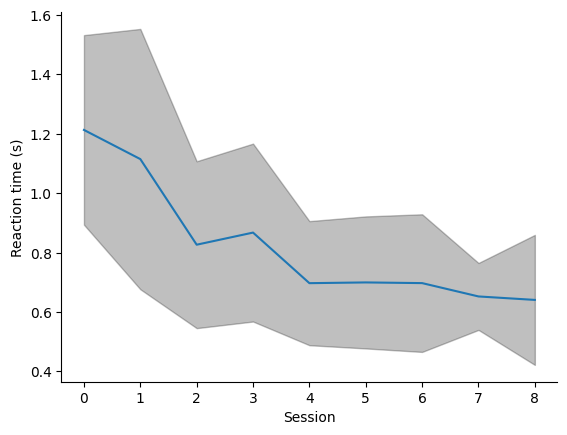

In [64]:
from plotting import average_reaction_time
average_reaction_time(group_experiments)

In [66]:
from plotting import plot_nb_trials_vs_performances, two_half_performances

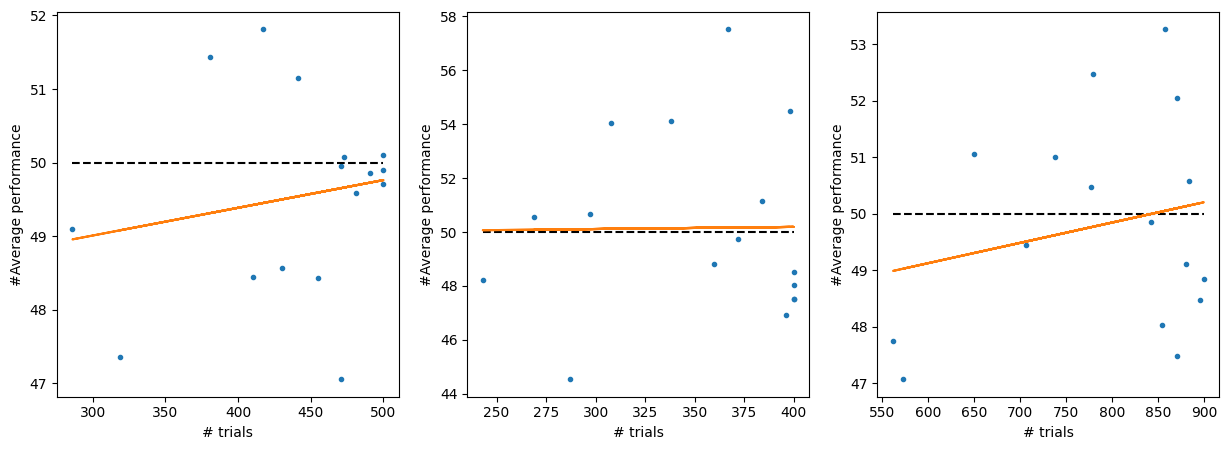

In [63]:
plot_nb_trials_vs_performances(group_experiments)

In [ ]:
two_half_performances(group_experiments, dates=['14/02/24', '15/02/24'])